In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('data/Ice_cream-selling-data.csv')

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.rename(columns={'Temperature (°C)': 'Temp', 'Ice Cream Sales (units)': 'Sales'}, inplace=True)
df.head()

,Temp,Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


Text(0, 0.5, 'Sales')

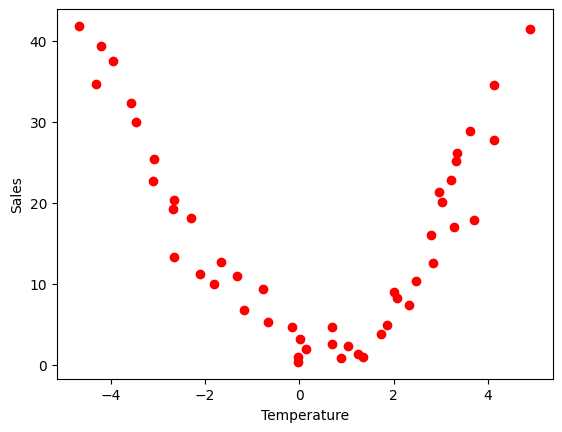

In [5]:
plt.scatter(df['Temp'], df['Sales'],color='r',marker='o')
plt.xlabel('Temperature')
plt.ylabel('Sales')

In [6]:
df.describe()

,Temp,Sales
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [7]:
### outliers # but we not remove them
q1 = np.percentile(df, 25)
q3 = np.percentile(df, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (df < lower_bound) | (df > upper_bound)
# df = df[~outliers.any(axis=1)]
outliers = pd.DataFrame(outliers).sum()
outliers


Temp     0
Sales    7
dtype: int64

In [8]:
## quadratic equation used - = y==0.5^2+1.5x+2+outliers

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['Temp'],df['Sales'],test_size=0.38,random_state=42)

In [10]:
## simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
accuracy = model.score(X_test.values.reshape(-1,1),y_test)
print(f'MSE: {mse}\nMAE: {mae}\nR2: {r2}\nAccuracy: {accuracy*100}%')

MSE: 140.84056167159665
MAE: 10.436840253292415
R2: -0.09180426535585928
Accuracy: -9.180426535585928%


<Axes: xlabel='Temp', ylabel='Sales'>

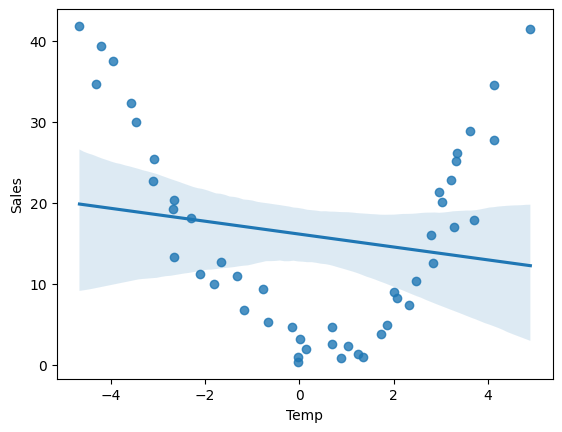

In [13]:
sns.regplot(x='Temp',y='Sales',data=df)

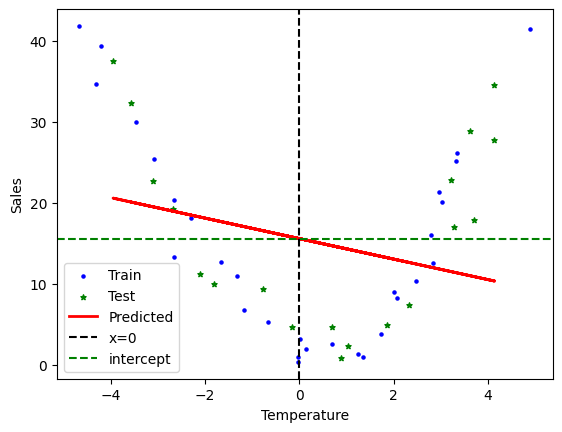

In [14]:
plt.scatter(X_train,y_train,color='b',marker='o',s=5,label='Train')
plt.scatter(X_test,y_test,color='green',marker='*',s=15,label='Test')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Predicted')
plt.axvline(x=0, color='black', linestyle='--',label='x=0')
plt.axhline(y=model.intercept_, color='g', linestyle='--',label='intercept')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.legend()

In [15]:
## polinomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)

In [16]:
X_train_poly = poly.fit_transform(X_train.values.reshape(-1,1))
X_test_poly = poly.transform(X_test.values.reshape(-1,1))
X_test_poly, X_train_poly   

(array([[ 1.        , -1.81893761,  3.30853403],
        [ 1.        ,  3.70405744, 13.72004151],
        [ 1.        ,  4.13353379, 17.08610158],
        [ 1.        ,  3.61077848, 13.03772121],
        [ 1.        , -0.77333004,  0.59803936],
        [ 1.        ,  1.02418081,  1.04894634],
        [ 1.        ,  0.87490503,  0.76545881],
        [ 1.        ,  0.69359887,  0.4810794 ],
        [ 1.        ,  1.85055193,  3.42454243],
        [ 1.        , -0.14963487,  0.02239059],
        [ 1.        , -2.11186969,  4.45999359],
        [ 1.        , -3.57855372, 12.8060467 ],
        [ 1.        ,  2.31859124,  5.37586534],
        [ 1.        , -2.67246083,  7.14204687],
        [ 1.        , -3.94966109, 15.59982272],
        [ 1.        , -3.10844012,  9.66239999],
        [ 1.        ,  3.21136614, 10.31287251],
        [ 1.        ,  3.27004407, 10.69318821],
        [ 1.        ,  4.13086796, 17.06407011]]),
 array([[ 1.00000000e+00, -1.32637898e+00,  1.75928121e+00],
      

In [17]:
poly_model = LinearRegression()

In [18]:
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = poly_model.predict(X_test_poly)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
accuracy = poly_model.score(X_test_poly,y_test)
print(f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}\nAccuracy: {accuracy*100 :.2f} %')

MSE: 11.74
MAE: 2.94
R2: 0.91
Accuracy: 90.90 %


In [20]:
print(poly_model.coef_,poly_model.intercept_)

[ 0.         -0.62747863  1.81691077] 3.0119497285736383


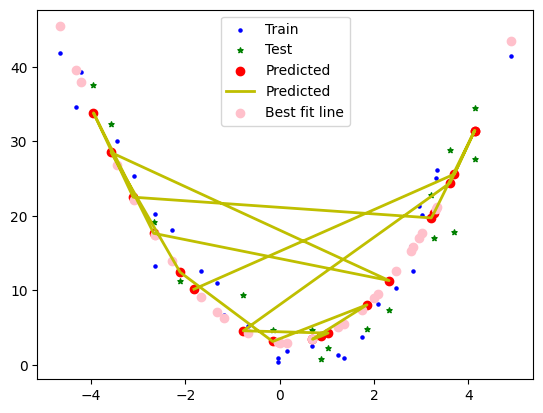

In [21]:
plt.scatter(X_train,y_train,color='b',marker='o',s=5,label='Train')
plt.scatter(X_test,y_test,color='green',marker='*',s=15,label='Test')
plt.scatter(X_test,poly_model.predict(X_test_poly),color='red',label='Predicted')
plt.plot(X_test,poly_model.predict(X_test_poly),color='y',linewidth=2,label='Predicted')
plt.scatter(X_train,poly_model.predict(X_train_poly),color='pink',label='Best fit line')
plt.legend()

In [22]:
## polinomial regression  degree = 3

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train.values.reshape(-1,1))
X_test_poly = poly.transform(X_test.values.reshape(-1,1))

poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)
y_pred = poly_model.predict(X_test_poly)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
accuracy = poly_model.score(X_test_poly,y_test)
print(f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}\nAccuracy: {accuracy*100 :.2f} %')

MSE: 11.33
MAE: 2.88
R2: 0.91
Accuracy: 91.21 %


#### Pipeline concepts

In [23]:
from sklearn.pipeline import Pipeline  ## combile 2 model but accuracy is not good

In [24]:
def poly_regression(degree):
    poly = PolynomialFeatures(degree=degree,include_bias=True)
    poly_model = LinearRegression()
    poly_model = Pipeline([('Poly',poly),('Model',poly_model)])
    X_train_poly = poly.fit_transform(X_train.values.reshape(-1,1))
    X_test_poly = poly.transform(X_test.values.reshape(-1,1))
    poly_model.fit(X_train_poly,y_train)
    y_pred = poly_model.predict(X_test_poly)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    accuracy = poly_model.score(X_test_poly,y_test)
    try:
        plt.scatter(X_train,y_train,color='b',marker='o',s=5,label='Train')
        plt.scatter(X_test,y_test,color='green',marker='*',s=15,label='Test')
        plt.scatter(X_test,poly_model.predict(X_test_poly),color='red',label='Predicted')
        plt.plot(X_test,poly_model.predict(X_test_poly),color='y',linewidth=2,label='Predicted')
        plt.scatter(X_train,poly_model.predict(X_train_poly),color='pink',label='Best fit line')
        plt.legend()
    except:
        pass
    print(f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}\nAccuracy: {accuracy*100 :.2f} %')
    return model

MSE: 140.84
MAE: 10.44
R2: -0.09
Accuracy: -9.18 %


LinearRegression()

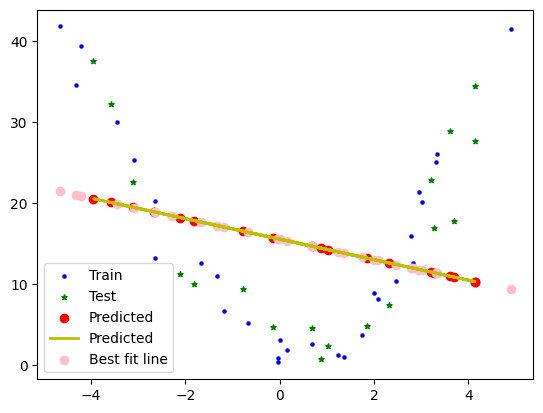

In [25]:
poly_regression(1)

MSE: 14.00
MAE: 3.11
R2: 0.89
Accuracy: 89.15 %


LinearRegression()

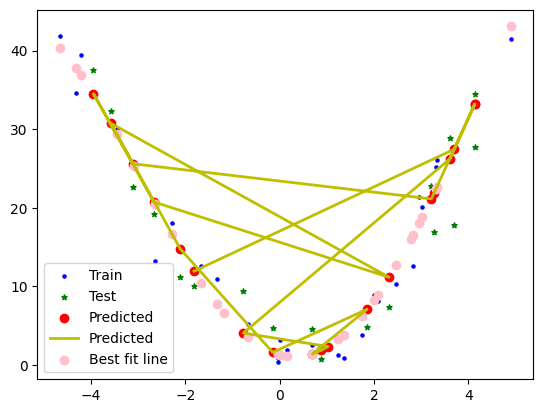

In [26]:
poly_regression(2)

MSE: 87.41
MAE: 5.58
R2: 0.32
Accuracy: 32.24 %


LinearRegression()

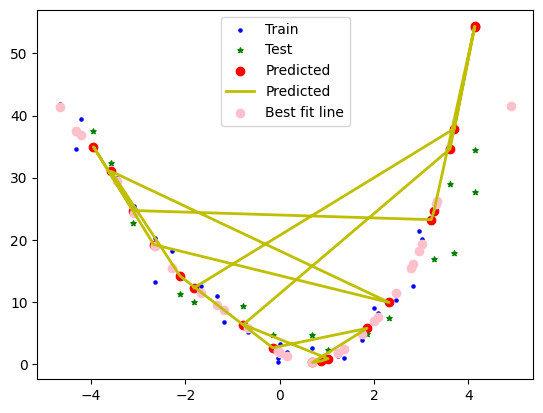

In [27]:
poly_regression(3)

MSE: 145.56
MAE: 10.16
R2: -0.13
Accuracy: -12.84 %


LinearRegression()

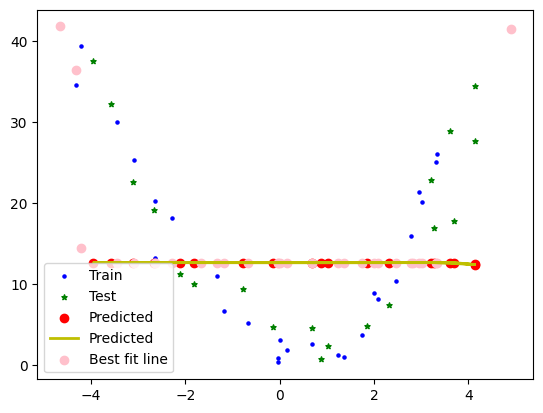

In [28]:
poly_regression(11) ## overfitting